In [1]:
from util.data import Dataset
import matplotlib.pyplot as plt
import os

BUFFER_SIZE = 1000
BATCH_SIZE = 16

TRAIN_PATH = os.path.join(os.getcwd(), 'Dataset', 'train')
TEST_PATH = os.path.join(os.getcwd(), 'Dataset', 'test')

ds = Dataset(train_path=TRAIN_PATH,
             x_file_pattern='/sketch/*.jpg',
             y_file_pattern='/real/*.jpg',
             test_path=TEST_PATH,
             buffer_size=BUFFER_SIZE,
             batch_size=BATCH_SIZE,
             seed=42)


In [2]:
import tensorflow as tf

tf.data.experimental.cardinality(ds.train_ds).numpy()

505

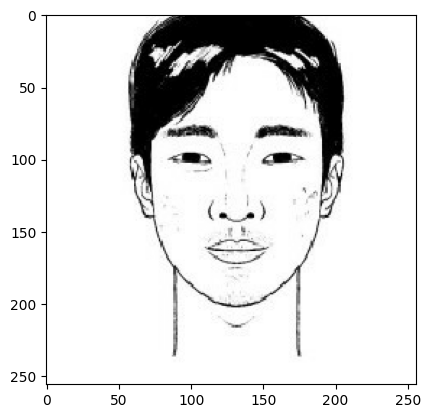

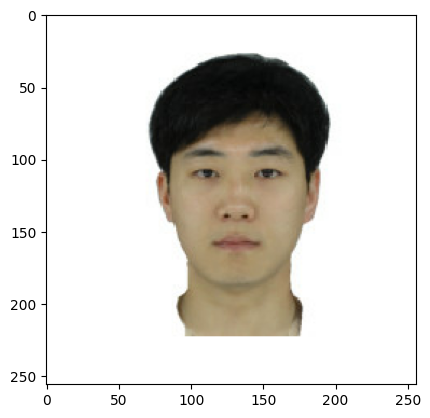

In [3]:
for sketch, real in ds.train_ds.take(1):
    plt.figure()
    plt.imshow((sketch[0].numpy()+1)/2)
    plt.figure()
    plt.imshow((real[0].numpy()+1)/2)
    break;
# print(sketch.shape)
# sketch = (sketch[0].numpy().reshape(256, 256, 3)+1)/2
# real = (real[0].numpy().reshape(256, 256, 3)+1)/2


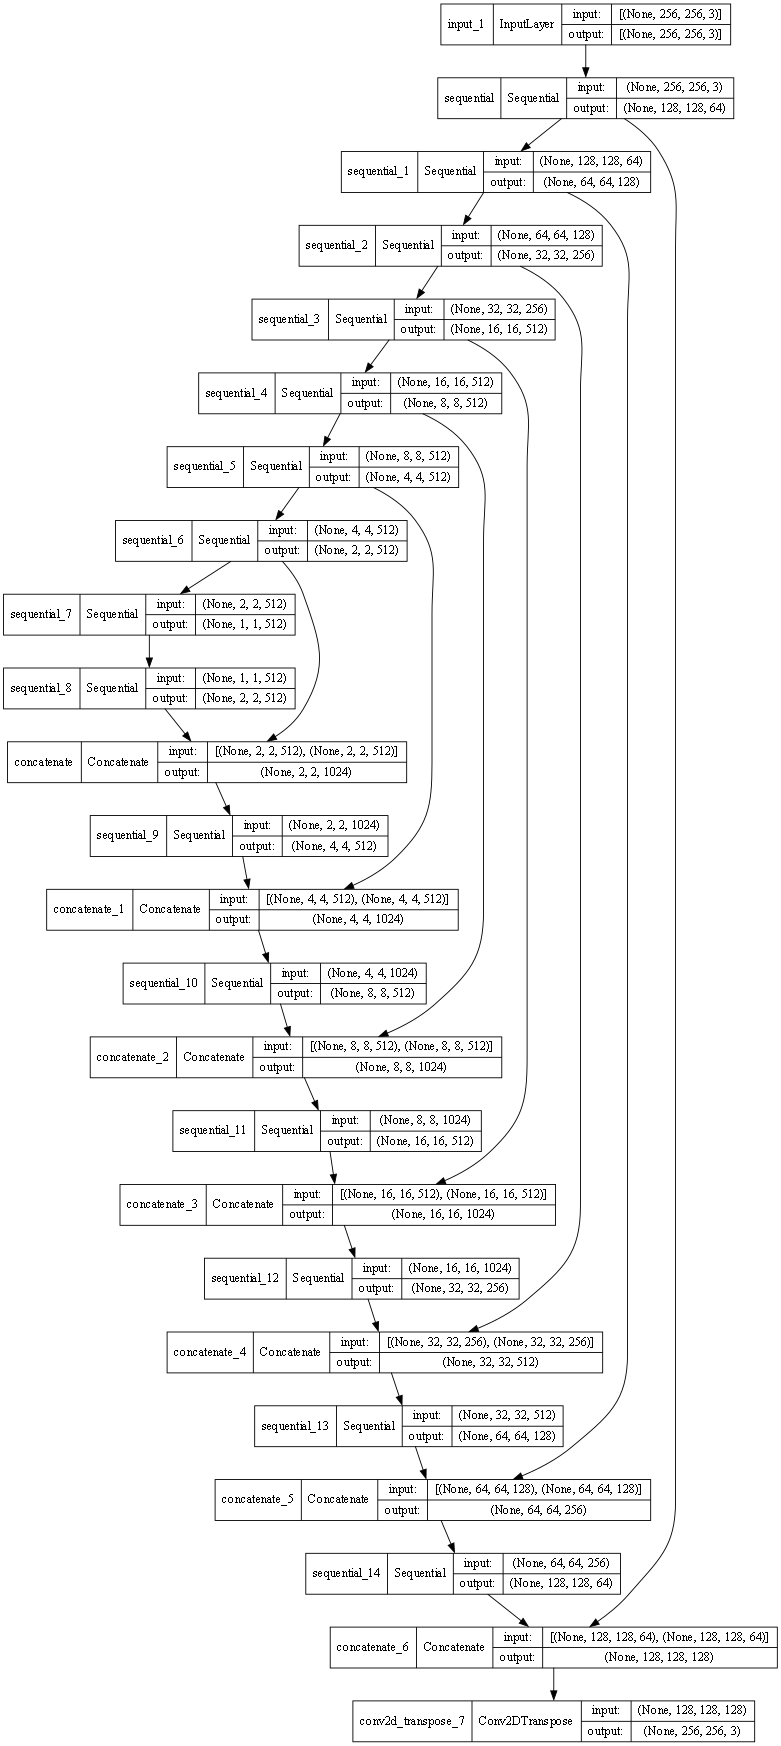

In [4]:
from tensorflow.keras.utils import plot_model
from net.generator import Generator

generator = Generator()
plot_model(generator(), show_shapes=True, dpi=64)


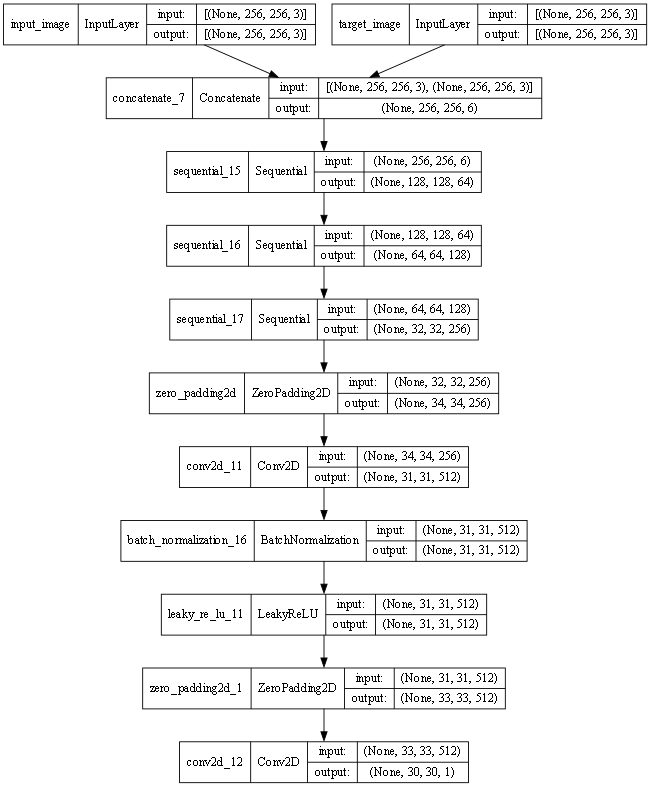

In [5]:
from net.discriminator import Discriminator

discriminator = Discriminator()
plot_model(discriminator(), show_shapes=True, dpi=64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


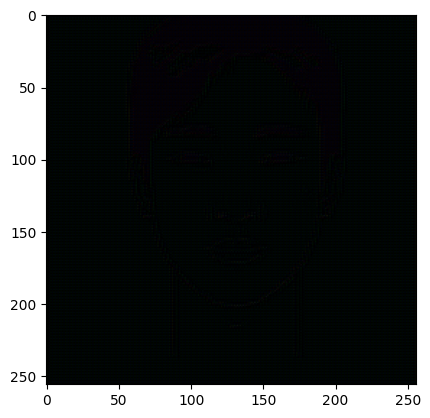

In [6]:
import tensorflow as tf

gen_output = generator()(sketch, training=False)
plt.imshow(gen_output[0, ...])


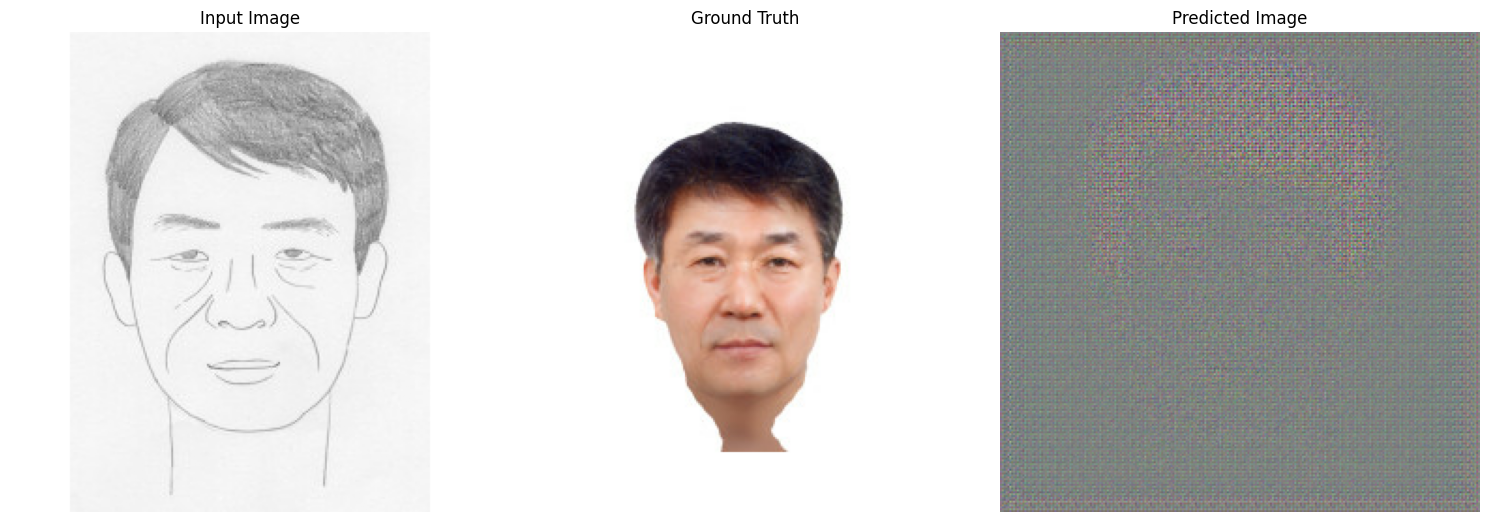

In [7]:
from util.image import generate_images

for example_input, example_target in ds.test_ds.take(1):
  generate_images(generator(), example_input, example_target, "test", False)


In [8]:
from net.learning import Learner

learner = Learner(
    generator= generator,
    discriminator= discriminator
)

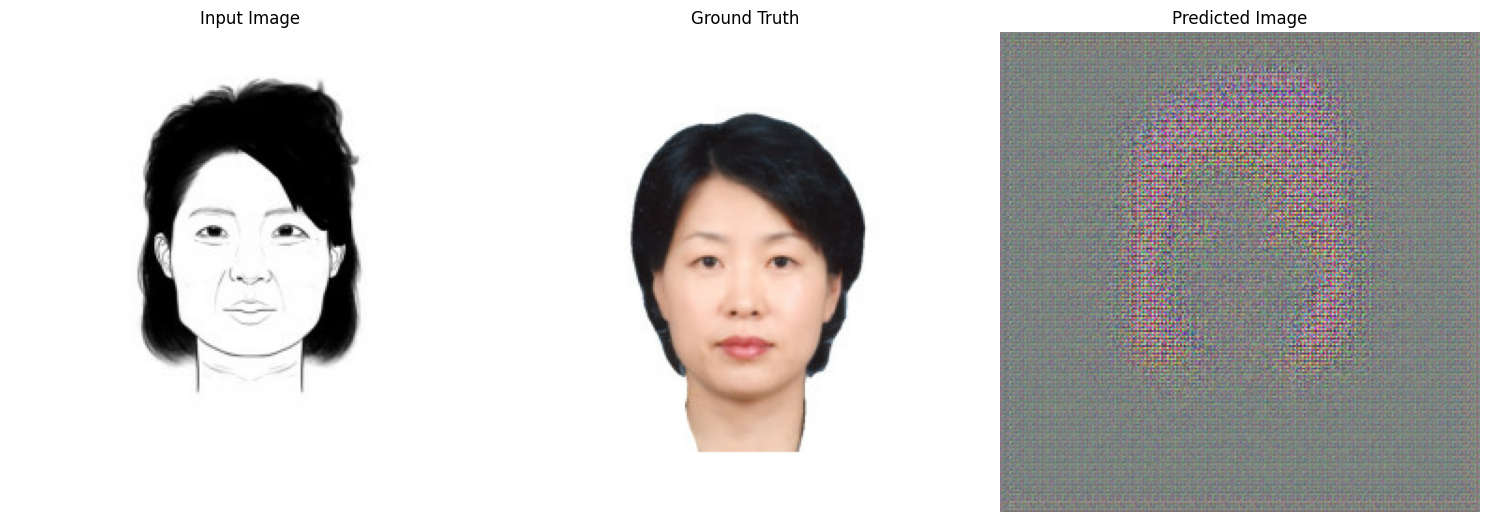

Epoch : 0


  9%|▊         | 43/505 [00:21<03:54,  1.97it/s] 


KeyboardInterrupt: 

In [9]:
learner.fit(ds.train_ds, 1, ds.test_ds)